<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KDT_project/Hackathon/Sleep Analysis Data (1).csv')

In [ ]:
data.shape

(2955, 5)

In [172]:
data.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,2,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,1,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,2,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,1,Sujeong의 Apple Watch


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          2955 non-null   object 
 1   End            2955 non-null   object 
 2   Duration (hr)  2955 non-null   float64
 3   Value          2955 non-null   object 
 4   Source         2955 non-null   object 
dtypes: float64(1), object(4)
memory usage: 115.6+ KB


In [ ]:
# "Source" 열의 데이터를 레이블링 해줌.
# deep: 1, core:2, rem:3, awake:4
data['Value']= data['Value'].replace('Deep',1)
data['Value']= data['Value'].replace('Core',2)
data['Value']= data['Value'].replace('REM',3)
data['Value']= data['Value'].replace('Awake',4)

In [ ]:
data.head()

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,2,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,1,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,2,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,1,Sujeong의 Apple Watch


In [ ]:
# first - 2/26-3/25 (2/26-3/20, 3/22-3/25) : 3/21일자 데이터가 결측치라 제외해야 함.

In [ ]:
# Series to datetime
# 데이터 타입을 datetime으로 변경. 날짜와 시간 추출이 가능하도록 함.
data['Start'] = pd.to_datetime(data['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
data['End'] = pd.to_datetime(data['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Start          2955 non-null   datetime64[ns]
 1   End            2955 non-null   datetime64[ns]
 2   Duration (hr)  2955 non-null   float64       
 3   Value          2955 non-null   object        
 4   Source         2955 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 115.6+ KB


In [ ]:
import datetime

# date.weekday() : 월 ~ 일 = 0 ~ 6

In [ ]:
# 시작일자 2/26
start_date = '2023-02-25 12:00:00'
end_date = '2023-02-26 12:00:00'
Feb_26 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
Feb_26 = Feb_26[((Feb_26['Source'] != 'NHC') & (Feb_26['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-02-26"
Feb_26["year-month-day"] = date
Feb_26["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
Feb_26

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6
501,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6
503,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6
504,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6
505,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6
507,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6
508,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6


In [ ]:
Feb_26.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 495 to 538
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Start           34 non-null     datetime64[ns]
 1   End             34 non-null     datetime64[ns]
 2   Duration (hr)   34 non-null     float64       
 3   Value           34 non-null     object        
 4   Source          34 non-null     object        
 5   year-month-day  34 non-null     object        
 6   weekday         34 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [ ]:
tmp = Feb_26

tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
tmp = tmp[["Duration (hr)", "Value"]]
tmp = np.array(tmp)
tmp

array([[50.0, 2],
       [100.0, 4],
       [58.0, 2],
       [25.0, 4],
       [325.0, 2],
       [283.0, 1],
       [17.0, 4],
       [575.0, 2],
       [158.0, 1],
       [308.0, 2],
       [25.0, 4],
       [708.0, 2],
       [83.0, 1],
       [525.0, 2],
       [325.0, 3],
       [8.0, 4],
       [17.0, 2],
       [75.0, 3],
       [133.0, 4],
       [417.0, 2],
       [17.0, 4],
       [617.0, 2],
       [125.0, 1],
       [117.0, 2],
       [333.0, 3],
       [1070.0, 2],
       [708.0, 3],
       [17.0, 4],
       [375.0, 2],
       [8.0, 4],
       [567.0, 2],
       [550.0, 3],
       [258.0, 4],
       [417.0, 2]], dtype=object)

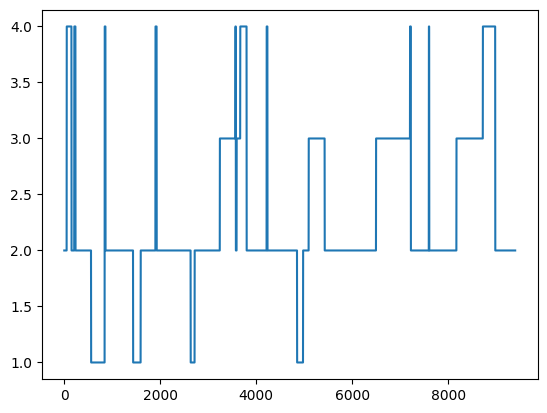

In [ ]:
x_list = []
for x in tmp:
  timeseries = np.ones([int(x[0])]) * x[1]
  x_list.append(timeseries)

x_list

ts = np.concatenate(x_list)

plt.plot(ts)

In [ ]:
import os
# 데이터 파일 저장 경로 지정
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

data.to_csv('data.csv')

In [ ]:
import os
# 데이터 파일 저장 경로 지정
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

Feb_26.to_csv('Feb_26.csv')


# 열 이름은 보내지 않기
# df1.to_csv('mycsv.csv',header="False")

# 행 이름은 보내지 않기.
# df1.to_csv('mycsv.csv',header=False,index=False)

In [ ]:
start_date = '2023-02-26 12:00:00'
end_date = '2023-02-27 12:00:00'
Feb_27 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
Feb_27 = Feb_27[((Feb_27['Source'] != 'NHC') & (Feb_27['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-02-27"
Feb_27["year-month-day"] = date
Feb_27["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
Feb_27

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
541,2023-02-26 23:36:12,2023-02-26 23:57:42,0.358,2,Sujeong의 Apple Watch,2023-02-27,0
543,2023-02-26 23:57:42,2023-02-27 00:31:12,0.558,1,Sujeong의 Apple Watch,2023-02-27,0
544,2023-02-27 00:31:12,2023-02-27 00:32:12,0.017,2,Sujeong의 Apple Watch,2023-02-27,0
545,2023-02-27 00:32:12,2023-02-27 00:39:12,0.117,3,Sujeong의 Apple Watch,2023-02-27,0
546,2023-02-27 00:39:12,2023-02-27 00:39:42,0.008,4,Sujeong의 Apple Watch,2023-02-27,0
547,2023-02-27 00:39:42,2023-02-27 01:04:12,0.408,2,Sujeong의 Apple Watch,2023-02-27,0
549,2023-02-27 01:04:12,2023-02-27 01:07:12,0.050,1,Sujeong의 Apple Watch,2023-02-27,0
550,2023-02-27 01:07:12,2023-02-27 01:22:12,0.250,2,Sujeong의 Apple Watch,2023-02-27,0
551,2023-02-27 01:22:12,2023-02-27 01:23:12,0.017,4,Sujeong의 Apple Watch,2023-02-27,0
552,2023-02-27 01:23:12,2023-02-27 01:28:42,0.092,2,Sujeong의 Apple Watch,2023-02-27,0


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

Feb_27.to_csv('Feb_27.csv')

In [ ]:
start_date = '2023-02-27 12:00:00'
end_date = '2023-02-28 12:00:00'
Feb_28 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
Feb_28 = Feb_28[((Feb_28['Source'] != 'NHC') & (Feb_28['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-02-28"
Feb_28["year-month-day"] = date
Feb_28["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
Feb_28

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
575,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023-02-28,1
577,2023-02-28 00:22:49,2023-02-28 00:59:19,0.608,1,Sujeong의 Apple Watch,2023-02-28,1
578,2023-02-28 00:59:19,2023-02-28 01:06:19,0.117,2,Sujeong의 Apple Watch,2023-02-28,1
579,2023-02-28 01:06:19,2023-02-28 01:21:19,0.250,3,Sujeong의 Apple Watch,2023-02-28,1
580,2023-02-28 01:21:19,2023-02-28 02:04:19,0.717,2,Sujeong의 Apple Watch,2023-02-28,1
581,2023-02-28 02:04:19,2023-02-28 02:24:19,0.333,1,Sujeong의 Apple Watch,2023-02-28,1
582,2023-02-28 02:24:19,2023-02-28 03:30:19,1.100,2,Sujeong의 Apple Watch,2023-02-28,1
583,2023-02-28 03:30:19,2023-02-28 03:54:49,0.408,3,Sujeong의 Apple Watch,2023-02-28,1
584,2023-02-28 03:54:49,2023-02-28 03:57:49,0.050,2,Sujeong의 Apple Watch,2023-02-28,1
585,2023-02-28 03:57:49,2023-02-28 04:05:19,0.125,3,Sujeong의 Apple Watch,2023-02-28,1


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

Feb_28.to_csv('Feb_28.csv')

In [ ]:
data.loc[600:650]

,Start,End,Duration (hr),Value,Source
600,2023-02-28 06:07:49,2023-02-28 06:11:19,0.058,4,Sujeong의 Apple Watch
601,2023-02-28 06:11:19,2023-02-28 06:55:19,0.733,2,Sujeong의 Apple Watch
602,2023-02-28 06:11:19,2023-02-28 06:55:19,0.733,InBed,Sujeong의 Apple Watch
603,2023-02-28 06:55:19,2023-02-28 06:57:19,0.033,4,Sujeong의 Apple Watch
604,2023-02-28 06:57:19,2023-02-28 06:58:19,0.017,2,Sujeong의 Apple Watch
605,2023-02-28 06:57:19,2023-02-28 06:58:19,0.017,InBed,Sujeong의 Apple Watch
606,2023-03-01 01:03:51,2023-03-01 03:14:18,2.170,InBed,NHC
607,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,2,Sujeong의 Apple Watch
608,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,InBed,Sujeong의 Apple Watch
609,2023-03-01 02:12:14,2023-03-01 02:13:14,0.017,4,Sujeong의 Apple Watch


In [ ]:
start_date = '2023-03-01 00:00:00'
end_date = '2023-03-01 12:00:00'
March_1 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_1 = March_1[((March_1['Source'] != 'NHC') & (March_1['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-01"
March_1["year-month-day"] = date
March_1["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_1

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
607,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,2,Sujeong의 Apple Watch,2023-03-01,2
609,2023-03-01 02:12:14,2023-03-01 02:13:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
610,2023-03-01 02:13:14,2023-03-01 02:22:14,0.150,2,Sujeong의 Apple Watch,2023-03-01,2
612,2023-03-01 02:22:14,2023-03-01 02:23:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
613,2023-03-01 02:23:14,2023-03-01 02:30:44,0.125,2,Sujeong의 Apple Watch,2023-03-01,2
615,2023-03-01 02:30:44,2023-03-01 02:46:14,0.258,4,Sujeong의 Apple Watch,2023-03-01,2
616,2023-03-01 02:46:14,2023-03-01 02:56:44,0.175,2,Sujeong의 Apple Watch,2023-03-01,2
618,2023-03-01 02:56:44,2023-03-01 03:27:44,0.517,4,Sujeong의 Apple Watch,2023-03-01,2
620,2023-03-01 03:27:44,2023-03-01 03:53:14,0.425,2,Sujeong의 Apple Watch,2023-03-01,2
622,2023-03-01 03:53:14,2023-03-01 04:20:14,0.450,1,Sujeong의 Apple Watch,2023-03-01,2


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_1.to_csv('March_1.csv')

In [ ]:
start_date = '2023-03-01 12:00:00'
end_date = '2023-03-02 12:00:00'
March_2 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_2 = March_2[((March_2['Source'] != 'NHC') & (March_2['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-02"
March_2["year-month-day"] = date
March_2["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_2

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
647,2023-03-01 23:54:17,2023-03-01 23:57:17,0.050,2,Sujeong의 Apple Watch,2023-03-02,3
649,2023-03-01 23:57:17,2023-03-02 00:00:47,0.058,4,Sujeong의 Apple Watch,2023-03-02,3
651,2023-03-02 00:00:47,2023-03-02 00:23:17,0.375,2,Sujeong의 Apple Watch,2023-03-02,3
653,2023-03-02 00:23:17,2023-03-02 00:43:47,0.342,1,Sujeong의 Apple Watch,2023-03-02,3
654,2023-03-02 00:43:47,2023-03-02 00:51:47,0.133,2,Sujeong의 Apple Watch,2023-03-02,3
655,2023-03-02 00:51:47,2023-03-02 01:05:47,0.233,1,Sujeong의 Apple Watch,2023-03-02,3
656,2023-03-02 01:05:47,2023-03-02 01:12:47,0.117,2,Sujeong의 Apple Watch,2023-03-02,3
657,2023-03-02 01:12:47,2023-03-02 01:20:47,0.133,3,Sujeong의 Apple Watch,2023-03-02,3
658,2023-03-02 01:20:47,2023-03-02 01:48:47,0.467,2,Sujeong의 Apple Watch,2023-03-02,3
659,2023-03-02 01:48:47,2023-03-02 02:14:17,0.425,1,Sujeong의 Apple Watch,2023-03-02,3


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_2.to_csv('March_2.csv')

In [ ]:
start_date = '2023-03-02 12:00:00'
end_date = '2023-03-03 12:00:00'
March_3 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_3 = March_3[((March_3['Source'] != 'NHC') & (March_3['Value'] != "InBed"))]


# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-03"
March_3["year-month-day"] = date
March_3["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_3

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
689,2023-03-03 00:13:13,2023-03-03 00:16:43,0.058,2,Sujeong의 Apple Watch,2023-03-03,4
691,2023-03-03 00:16:43,2023-03-03 00:33:43,0.283,4,Sujeong의 Apple Watch,2023-03-03,4
693,2023-03-03 00:33:43,2023-03-03 00:37:43,0.067,2,Sujeong의 Apple Watch,2023-03-03,4
695,2023-03-03 00:37:43,2023-03-03 00:43:43,0.100,4,Sujeong의 Apple Watch,2023-03-03,4
696,2023-03-03 00:43:43,2023-03-03 01:09:13,0.425,2,Sujeong의 Apple Watch,2023-03-03,4
698,2023-03-03 01:09:13,2023-03-03 01:27:13,0.300,1,Sujeong의 Apple Watch,2023-03-03,4
699,2023-03-03 01:27:13,2023-03-03 01:43:13,0.267,2,Sujeong의 Apple Watch,2023-03-03,4
700,2023-03-03 01:43:13,2023-03-03 01:50:43,0.125,1,Sujeong의 Apple Watch,2023-03-03,4
701,2023-03-03 01:50:43,2023-03-03 02:13:13,0.375,2,Sujeong의 Apple Watch,2023-03-03,4
702,2023-03-03 02:13:13,2023-03-03 02:36:13,0.383,3,Sujeong의 Apple Watch,2023-03-03,4


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_3.to_csv('March_3.csv')

In [ ]:
start_date = '2023-03-03 12:00:00'
end_date = '2023-03-04 12:00:00'
March_4 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_4 = March_4[((March_4['Source'] != 'NHC') & (March_4['Value'] != "InBed"))]


# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-04"
March_4["year-month-day"] = date
March_4["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_4

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
722,2023-03-04 00:17:46,2023-03-04 00:18:46,0.017,2,Sujeong의 Apple Watch,2023-03-04,5
724,2023-03-04 00:18:46,2023-03-04 00:19:16,0.008,4,Sujeong의 Apple Watch,2023-03-04,5
725,2023-03-04 00:19:16,2023-03-04 00:39:46,0.342,2,Sujeong의 Apple Watch,2023-03-04,5
727,2023-03-04 00:39:46,2023-03-04 00:48:16,0.142,1,Sujeong의 Apple Watch,2023-03-04,5
728,2023-03-04 00:48:16,2023-03-04 00:52:46,0.075,2,Sujeong의 Apple Watch,2023-03-04,5
729,2023-03-04 00:52:46,2023-03-04 01:22:46,0.500,1,Sujeong의 Apple Watch,2023-03-04,5
730,2023-03-04 01:22:46,2023-03-04 01:24:16,0.025,2,Sujeong의 Apple Watch,2023-03-04,5
731,2023-03-04 01:24:16,2023-03-04 01:36:16,0.200,3,Sujeong의 Apple Watch,2023-03-04,5
732,2023-03-04 01:36:16,2023-03-04 01:37:16,0.017,4,Sujeong의 Apple Watch,2023-03-04,5
733,2023-03-04 01:37:16,2023-03-04 02:12:46,0.592,2,Sujeong의 Apple Watch,2023-03-04,5


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_4.to_csv('March_4.csv')

In [ ]:
start_date = '2023-03-04 12:00:00'
end_date = '2023-03-05 12:00:00'
March_5 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_5 = March_5[((March_5['Source'] != 'NHC') & (March_5['Value'] != "InBed"))]


# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-05"
March_5["year-month-day"] = date
March_5["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_5

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
761,2023-03-05 00:20:27,2023-03-05 00:41:27,0.350,2,Sujeong의 Apple Watch,2023-03-05,6
763,2023-03-05 00:41:27,2023-03-05 01:17:57,0.608,1,Sujeong의 Apple Watch,2023-03-05,6
764,2023-03-05 01:17:57,2023-03-05 01:18:57,0.017,2,Sujeong의 Apple Watch,2023-03-05,6
765,2023-03-05 01:18:57,2023-03-05 01:25:57,0.117,3,Sujeong의 Apple Watch,2023-03-05,6
766,2023-03-05 01:25:57,2023-03-05 01:26:27,0.008,4,Sujeong의 Apple Watch,2023-03-05,6
767,2023-03-05 01:26:27,2023-03-05 02:09:57,0.725,2,Sujeong의 Apple Watch,2023-03-05,6
769,2023-03-05 02:09:57,2023-03-05 02:13:57,0.067,1,Sujeong의 Apple Watch,2023-03-05,6
770,2023-03-05 02:13:57,2023-03-05 02:49:57,0.600,2,Sujeong의 Apple Watch,2023-03-05,6
771,2023-03-05 02:49:57,2023-03-05 02:51:57,0.033,3,Sujeong의 Apple Watch,2023-03-05,6
772,2023-03-05 02:51:57,2023-03-05 02:52:27,0.008,4,Sujeong의 Apple Watch,2023-03-05,6


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_5.to_csv('March_5.csv')

In [ ]:
start_date = '2023-03-05 12:00:00'
end_date = '2023-03-06 12:00:00'
March_6 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_6 = March_6[((March_6['Source'] != 'NHC') & (March_6['Value'] != "InBed"))]


# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-06"
March_6["year-month-day"] = date
March_6["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_6

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
793,2023-03-05 23:29:05,2023-03-05 23:30:35,0.025,2,Sujeong의 Apple Watch,2023-03-06,0
795,2023-03-05 23:30:35,2023-03-05 23:34:05,0.058,4,Sujeong의 Apple Watch,2023-03-06,0
797,2023-03-05 23:34:05,2023-03-05 23:54:05,0.333,2,Sujeong의 Apple Watch,2023-03-06,0
799,2023-03-05 23:54:05,2023-03-05 23:57:05,0.050,1,Sujeong의 Apple Watch,2023-03-06,0
800,2023-03-05 23:57:05,2023-03-05 23:59:35,0.042,2,Sujeong의 Apple Watch,2023-03-06,0
801,2023-03-05 23:59:35,2023-03-06 00:23:35,0.400,1,Sujeong의 Apple Watch,2023-03-06,0
802,2023-03-06 00:23:35,2023-03-06 00:35:05,0.192,2,Sujeong의 Apple Watch,2023-03-06,0
803,2023-03-06 00:35:05,2023-03-06 00:35:35,0.008,3,Sujeong의 Apple Watch,2023-03-06,0
804,2023-03-06 00:35:35,2023-03-06 00:37:05,0.025,2,Sujeong의 Apple Watch,2023-03-06,0
805,2023-03-06 00:37:05,2023-03-06 00:53:35,0.275,3,Sujeong의 Apple Watch,2023-03-06,0


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_6.to_csv('March_6.csv')

In [ ]:
start_date = '2023-03-06 12:00:00'
end_date = '2023-03-07 12:00:00'
March_7 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_7 = March_7[((March_7['Source'] != 'NHC') & (March_7['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-07"
March_7["year-month-day"] = date
March_7["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_7

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
827,2023-03-06 22:49:34,2023-03-06 23:09:04,0.325,2,Sujeong의 Apple Watch,2023-03-07,1
829,2023-03-06 23:09:04,2023-03-06 23:42:04,0.550,1,Sujeong의 Apple Watch,2023-03-07,1
830,2023-03-06 23:42:04,2023-03-06 23:52:04,0.167,2,Sujeong의 Apple Watch,2023-03-07,1
831,2023-03-06 23:52:04,2023-03-06 23:56:34,0.075,3,Sujeong의 Apple Watch,2023-03-07,1
832,2023-03-06 23:56:34,2023-03-07 00:16:04,0.325,2,Sujeong의 Apple Watch,2023-03-07,1
833,2023-03-07 00:16:04,2023-03-07 00:16:34,0.008,4,Sujeong의 Apple Watch,2023-03-07,1
834,2023-03-07 00:16:34,2023-03-07 00:39:04,0.375,2,Sujeong의 Apple Watch,2023-03-07,1
836,2023-03-07 00:39:04,2023-03-07 00:48:34,0.158,1,Sujeong의 Apple Watch,2023-03-07,1
837,2023-03-07 00:48:34,2023-03-07 01:26:34,0.633,2,Sujeong의 Apple Watch,2023-03-07,1
838,2023-03-07 01:26:34,2023-03-07 01:49:34,0.383,3,Sujeong의 Apple Watch,2023-03-07,1


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_7.to_csv('March_7.csv')

In [ ]:
start_date = '2023-03-07 12:00:00'
end_date = '2023-03-08 12:00:00'
March_8 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_8 = March_8[((March_8['Source'] != 'NHC') & (March_8['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-08"
March_8["year-month-day"] = date
March_8["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_8

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
878,2023-03-07 23:11:48,2023-03-07 23:25:48,0.233,2,Sujeong의 Apple Watch,2023-03-08,2
880,2023-03-07 23:25:48,2023-03-07 23:26:48,0.017,4,Sujeong의 Apple Watch,2023-03-08,2
881,2023-03-07 23:26:48,2023-03-07 23:41:48,0.250,2,Sujeong의 Apple Watch,2023-03-08,2
883,2023-03-07 23:41:48,2023-03-08 00:18:18,0.608,1,Sujeong의 Apple Watch,2023-03-08,2
884,2023-03-08 00:18:18,2023-03-08 00:18:48,0.008,4,Sujeong의 Apple Watch,2023-03-08,2
885,2023-03-08 00:18:48,2023-03-08 00:25:18,0.108,2,Sujeong의 Apple Watch,2023-03-08,2
887,2023-03-08 00:25:18,2023-03-08 00:40:48,0.258,3,Sujeong의 Apple Watch,2023-03-08,2
888,2023-03-08 00:40:48,2023-03-08 01:05:48,0.417,2,Sujeong의 Apple Watch,2023-03-08,2
889,2023-03-08 01:05:48,2023-03-08 01:13:48,0.133,1,Sujeong의 Apple Watch,2023-03-08,2
890,2023-03-08 01:13:48,2023-03-08 01:15:18,0.025,4,Sujeong의 Apple Watch,2023-03-08,2


In [ ]:
start_date = '2023-03-08 12:00:00'
end_date = '2023-03-09 12:00:00'
March_9 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_9 = March_9[((March_9['Source'] != 'NHC') & (March_9['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-09"
March_9["year-month-day"] = date
March_9["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_9

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
913,2023-03-08 23:11:34,2023-03-08 23:13:04,0.025,2,Sujeong의 Apple Watch,2023-03-09,3
915,2023-03-08 23:13:04,2023-03-08 23:14:34,0.025,4,Sujeong의 Apple Watch,2023-03-09,3
916,2023-03-08 23:14:34,2023-03-08 23:29:34,0.250,2,Sujeong의 Apple Watch,2023-03-09,3
918,2023-03-08 23:29:34,2023-03-09 00:21:34,0.867,1,Sujeong의 Apple Watch,2023-03-09,3
919,2023-03-09 00:21:34,2023-03-09 00:22:04,0.008,4,Sujeong의 Apple Watch,2023-03-09,3
920,2023-03-09 00:22:04,2023-03-09 00:28:34,0.108,2,Sujeong의 Apple Watch,2023-03-09,3
922,2023-03-09 00:28:34,2023-03-09 00:35:34,0.117,3,Sujeong의 Apple Watch,2023-03-09,3
923,2023-03-09 00:35:34,2023-03-09 01:53:34,1.300,2,Sujeong의 Apple Watch,2023-03-09,3
924,2023-03-09 01:53:34,2023-03-09 02:41:34,0.800,3,Sujeong의 Apple Watch,2023-03-09,3
925,2023-03-09 02:41:34,2023-03-09 04:15:34,1.570,2,Sujeong의 Apple Watch,2023-03-09,3


In [ ]:
start_date = '2023-03-09 12:00:00'
end_date = '2023-03-10 12:00:00'
March_10 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_10 = March_10[((March_10['Source'] != 'NHC') & (March_10['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-10"
March_10["year-month-day"] = date
March_10["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_10

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
939,2023-03-10 00:09:59,2023-03-10 00:10:59,0.017,2,Sujeong의 Apple Watch,2023-03-10,4
941,2023-03-10 00:10:59,2023-03-10 00:12:29,0.025,4,Sujeong의 Apple Watch,2023-03-10,4
942,2023-03-10 00:12:29,2023-03-10 00:32:59,0.342,2,Sujeong의 Apple Watch,2023-03-10,4
944,2023-03-10 00:32:59,2023-03-10 00:48:29,0.258,1,Sujeong의 Apple Watch,2023-03-10,4
945,2023-03-10 00:48:29,2023-03-10 01:04:29,0.267,2,Sujeong의 Apple Watch,2023-03-10,4
946,2023-03-10 01:04:29,2023-03-10 01:05:29,0.017,4,Sujeong의 Apple Watch,2023-03-10,4
947,2023-03-10 01:05:29,2023-03-10 01:42:29,0.617,2,Sujeong의 Apple Watch,2023-03-10,4
949,2023-03-10 01:42:29,2023-03-10 01:51:29,0.150,1,Sujeong의 Apple Watch,2023-03-10,4
950,2023-03-10 01:51:29,2023-03-10 02:10:59,0.325,2,Sujeong의 Apple Watch,2023-03-10,4
951,2023-03-10 02:10:59,2023-03-10 02:23:29,0.208,1,Sujeong의 Apple Watch,2023-03-10,4


In [ ]:
start_date = '2023-03-10 12:00:00'
end_date = '2023-03-11 12:00:00'
March_11 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_11 = March_11[((March_11['Source'] != 'NHC') & (March_11['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-11"
March_11["year-month-day"] = date
March_11["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_11

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
998,2023-03-11 01:41:12,2023-03-11 01:42:12,0.017,2,Sujeong의 Apple Watch,2023-03-11,5
1000,2023-03-11 01:42:12,2023-03-11 01:46:12,0.067,4,Sujeong의 Apple Watch,2023-03-11,5
1001,2023-03-11 01:46:12,2023-03-11 01:48:12,0.033,2,Sujeong의 Apple Watch,2023-03-11,5
1003,2023-03-11 01:48:12,2023-03-11 01:49:42,0.025,4,Sujeong의 Apple Watch,2023-03-11,5
1004,2023-03-11 01:49:42,2023-03-11 02:25:12,0.592,2,Sujeong의 Apple Watch,2023-03-11,5
1006,2023-03-11 02:25:12,2023-03-11 02:33:12,0.133,4,Sujeong의 Apple Watch,2023-03-11,5
1007,2023-03-11 02:33:12,2023-03-11 02:36:42,0.058,2,Sujeong의 Apple Watch,2023-03-11,5
1009,2023-03-11 02:36:42,2023-03-11 02:39:42,0.050,4,Sujeong의 Apple Watch,2023-03-11,5
1010,2023-03-11 02:39:42,2023-03-11 02:59:12,0.325,2,Sujeong의 Apple Watch,2023-03-11,5
1012,2023-03-11 02:59:12,2023-03-11 03:03:12,0.067,4,Sujeong의 Apple Watch,2023-03-11,5


In [ ]:
start_date = '2023-03-11 12:00:00'
end_date = '2023-03-12 12:00:00'
March_12 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_12 = March_12[((March_12['Source'] != 'NHC') & (March_12['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-12"
March_12["year-month-day"] = date
March_12["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_12

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1075,2023-03-12 00:38:58,2023-03-12 00:53:28,0.242,2,Sujeong의 Apple Watch,2023-03-12,6
1077,2023-03-12 00:53:28,2023-03-12 01:13:58,0.342,1,Sujeong의 Apple Watch,2023-03-12,6
1078,2023-03-12 01:13:58,2023-03-12 01:17:28,0.058,2,Sujeong의 Apple Watch,2023-03-12,6
1079,2023-03-12 01:17:28,2023-03-12 01:37:58,0.342,1,Sujeong의 Apple Watch,2023-03-12,6
1080,2023-03-12 01:37:58,2023-03-12 01:47:58,0.167,2,Sujeong의 Apple Watch,2023-03-12,6
1081,2023-03-12 01:47:58,2023-03-12 01:48:58,0.017,4,Sujeong의 Apple Watch,2023-03-12,6
1082,2023-03-12 01:48:58,2023-03-12 02:16:58,0.467,2,Sujeong의 Apple Watch,2023-03-12,6
1084,2023-03-12 02:16:58,2023-03-12 02:23:28,0.108,1,Sujeong의 Apple Watch,2023-03-12,6
1085,2023-03-12 02:23:28,2023-03-12 02:28:58,0.092,2,Sujeong의 Apple Watch,2023-03-12,6
1086,2023-03-12 02:28:58,2023-03-12 02:41:58,0.217,1,Sujeong의 Apple Watch,2023-03-12,6


In [ ]:
start_date = '2023-03-12 12:00:00'
end_date = '2023-03-13 12:00:00'
March_13 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_13 = March_13[((March_13['Source'] != 'NHC') & (March_13['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-13"
March_13["year-month-day"] = date
March_13["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_13

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1127,2023-03-13 02:02:06,2023-03-13 02:03:36,0.025,2,Sujeong의 Apple Watch,2023-03-13,0
1129,2023-03-13 02:03:36,2023-03-13 02:05:06,0.025,4,Sujeong의 Apple Watch,2023-03-13,0
1130,2023-03-13 02:05:06,2023-03-13 02:29:06,0.400,2,Sujeong의 Apple Watch,2023-03-13,0
1132,2023-03-13 02:29:06,2023-03-13 02:41:06,0.200,1,Sujeong의 Apple Watch,2023-03-13,0
1133,2023-03-13 02:41:06,2023-03-13 02:59:06,0.300,2,Sujeong의 Apple Watch,2023-03-13,0
1134,2023-03-13 02:59:06,2023-03-13 03:00:36,0.025,1,Sujeong의 Apple Watch,2023-03-13,0
1135,2023-03-13 03:00:36,2023-03-13 04:31:36,1.520,2,Sujeong의 Apple Watch,2023-03-13,0
1136,2023-03-13 04:31:36,2023-03-13 04:35:36,0.067,1,Sujeong의 Apple Watch,2023-03-13,0
1137,2023-03-13 04:35:36,2023-03-13 04:48:06,0.208,2,Sujeong의 Apple Watch,2023-03-13,0
1138,2023-03-13 04:48:06,2023-03-13 05:13:36,0.425,3,Sujeong의 Apple Watch,2023-03-13,0


In [ ]:
start_date = '2023-03-13 12:00:00'
end_date = '2023-03-14 12:00:00'
March_14 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_14 = March_14[((March_14['Source'] != 'NHC') & (March_14['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-14"
March_14["year-month-day"] = date
March_14["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_14

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1163,2023-03-13 23:55:24,2023-03-14 00:11:54,0.275,2,Sujeong의 Apple Watch,2023-03-14,1
1165,2023-03-14 00:11:54,2023-03-14 00:48:24,0.608,1,Sujeong의 Apple Watch,2023-03-14,1
1167,2023-03-14 00:48:24,2023-03-14 02:04:24,1.270,2,Sujeong의 Apple Watch,2023-03-14,1
1168,2023-03-14 02:04:24,2023-03-14 02:19:24,0.250,1,Sujeong의 Apple Watch,2023-03-14,1
1169,2023-03-14 02:19:24,2023-03-14 02:21:24,0.033,2,Sujeong의 Apple Watch,2023-03-14,1
1170,2023-03-14 02:21:24,2023-03-14 02:21:54,0.008,4,Sujeong의 Apple Watch,2023-03-14,1
1171,2023-03-14 02:21:54,2023-03-14 02:30:24,0.142,2,Sujeong의 Apple Watch,2023-03-14,1
1173,2023-03-14 02:30:24,2023-03-14 03:13:24,0.717,3,Sujeong의 Apple Watch,2023-03-14,1
1174,2023-03-14 03:13:24,2023-03-14 03:15:54,0.042,2,Sujeong의 Apple Watch,2023-03-14,1
1175,2023-03-14 03:15:54,2023-03-14 03:16:54,0.017,4,Sujeong의 Apple Watch,2023-03-14,1


In [ ]:
start_date = '2023-03-14 12:00:00'
end_date = '2023-03-15 12:00:00'
March_15 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_15 = March_15[((March_15['Source'] != 'NHC') & (March_15['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-15"
March_15["year-month-day"] = date
March_15["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_15

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1195,2023-03-15 00:04:28,2023-03-15 00:23:58,0.325,2,Sujeong의 Apple Watch,2023-03-15,2
1198,2023-03-15 00:23:58,2023-03-15 01:04:58,0.683,1,Sujeong의 Apple Watch,2023-03-15,2
1199,2023-03-15 01:04:58,2023-03-15 02:30:28,1.420,2,Sujeong의 Apple Watch,2023-03-15,2
1200,2023-03-15 02:30:28,2023-03-15 02:32:58,0.042,4,Sujeong의 Apple Watch,2023-03-15,2
1201,2023-03-15 02:32:58,2023-03-15 02:48:58,0.267,2,Sujeong의 Apple Watch,2023-03-15,2
1203,2023-03-15 02:48:58,2023-03-15 02:50:58,0.033,3,Sujeong의 Apple Watch,2023-03-15,2
1204,2023-03-15 02:50:58,2023-03-15 02:51:28,0.008,2,Sujeong의 Apple Watch,2023-03-15,2
1205,2023-03-15 02:51:28,2023-03-15 03:19:58,0.475,3,Sujeong의 Apple Watch,2023-03-15,2
1206,2023-03-15 03:19:58,2023-03-15 04:50:28,1.510,2,Sujeong의 Apple Watch,2023-03-15,2
1207,2023-03-15 04:50:28,2023-03-15 04:50:58,0.008,4,Sujeong의 Apple Watch,2023-03-15,2


In [ ]:
start_date = '2023-03-15 12:00:00'
end_date = '2023-03-16 12:00:00'
March_16 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_16 = March_16[((March_16['Source'] != 'NHC') & (March_16['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-16"
March_16["year-month-day"] = date
March_16["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_16

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1224,2023-03-15 23:50:47,2023-03-16 00:08:17,0.292,2,Sujeong의 Apple Watch,2023-03-16,3
1226,2023-03-16 00:08:17,2023-03-16 00:35:47,0.458,1,Sujeong의 Apple Watch,2023-03-16,3
1227,2023-03-16 00:35:47,2023-03-16 00:37:47,0.033,2,Sujeong의 Apple Watch,2023-03-16,3
1228,2023-03-16 00:37:47,2023-03-16 00:52:47,0.250,1,Sujeong의 Apple Watch,2023-03-16,3
1229,2023-03-16 00:52:47,2023-03-16 00:53:47,0.017,2,Sujeong의 Apple Watch,2023-03-16,3
1230,2023-03-16 00:53:47,2023-03-16 00:55:17,0.025,4,Sujeong의 Apple Watch,2023-03-16,3
1231,2023-03-16 00:55:17,2023-03-16 00:58:17,0.050,2,Sujeong의 Apple Watch,2023-03-16,3
1233,2023-03-16 00:58:17,2023-03-16 01:05:17,0.117,3,Sujeong의 Apple Watch,2023-03-16,3
1234,2023-03-16 01:05:17,2023-03-16 01:30:47,0.425,2,Sujeong의 Apple Watch,2023-03-16,3
1235,2023-03-16 01:30:47,2023-03-16 01:31:17,0.008,1,Sujeong의 Apple Watch,2023-03-16,3


In [ ]:
start_date = '2023-03-16 12:00:00'
end_date = '2023-03-17 12:00:00'
March_17 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_17 = March_17[((March_17['Source'] != 'NHC') & (March_17['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-17"
March_17["year-month-day"] = date
March_17["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_17

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1284,2023-03-16 23:46:34,2023-03-17 00:07:04,0.342,2,Sujeong의 Apple Watch,2023-03-17,4
1286,2023-03-17 00:07:04,2023-03-17 00:40:04,0.550,1,Sujeong의 Apple Watch,2023-03-17,4
1287,2023-03-17 00:40:04,2023-03-17 00:45:04,0.083,2,Sujeong의 Apple Watch,2023-03-17,4
1288,2023-03-17 00:45:04,2023-03-17 00:48:04,0.050,3,Sujeong의 Apple Watch,2023-03-17,4
1289,2023-03-17 00:48:04,2023-03-17 01:10:04,0.367,2,Sujeong의 Apple Watch,2023-03-17,4
1290,2023-03-17 01:10:04,2023-03-17 01:13:34,0.058,1,Sujeong의 Apple Watch,2023-03-17,4
1291,2023-03-17 01:13:34,2023-03-17 01:24:34,0.183,2,Sujeong의 Apple Watch,2023-03-17,4
1292,2023-03-17 01:24:34,2023-03-17 01:30:34,0.100,1,Sujeong의 Apple Watch,2023-03-17,4
1293,2023-03-17 01:30:34,2023-03-17 01:56:34,0.433,2,Sujeong의 Apple Watch,2023-03-17,4
1294,2023-03-17 01:56:34,2023-03-17 02:32:04,0.592,3,Sujeong의 Apple Watch,2023-03-17,4


In [ ]:
start_date = '2023-03-17 12:00:00'
end_date = '2023-03-18 12:00:00'
March_18 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_18 = March_18[((March_18['Source'] != 'NHC') & (March_18['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-18"
March_18["year-month-day"] = date
March_18["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_18

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1316,2023-03-18 00:22:39,2023-03-18 00:28:09,0.092,2,Sujeong의 Apple Watch,2023-03-18,5
1318,2023-03-18 00:28:09,2023-03-18 00:29:09,0.017,4,Sujeong의 Apple Watch,2023-03-18,5
1319,2023-03-18 00:29:09,2023-03-18 00:30:09,0.017,2,Sujeong의 Apple Watch,2023-03-18,5
1322,2023-03-18 00:30:09,2023-03-18 00:32:39,0.042,4,Sujeong의 Apple Watch,2023-03-18,5
1323,2023-03-18 00:32:39,2023-03-18 00:59:39,0.450,2,Sujeong의 Apple Watch,2023-03-18,5
1325,2023-03-18 00:59:39,2023-03-18 01:06:09,0.108,1,Sujeong의 Apple Watch,2023-03-18,5
1326,2023-03-18 01:06:09,2023-03-18 01:12:09,0.100,2,Sujeong의 Apple Watch,2023-03-18,5
1327,2023-03-18 01:12:09,2023-03-18 01:25:39,0.225,1,Sujeong의 Apple Watch,2023-03-18,5
1328,2023-03-18 01:25:39,2023-03-18 01:36:39,0.183,2,Sujeong의 Apple Watch,2023-03-18,5
1329,2023-03-18 01:36:39,2023-03-18 01:50:09,0.225,3,Sujeong의 Apple Watch,2023-03-18,5


In [ ]:
start_date = '2023-03-18 12:00:00'
end_date = '2023-03-19 12:00:00'
March_19 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_19 = March_19[((March_19['Source'] != 'NHC') & (March_19['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-19"
March_19["year-month-day"] = date
March_19["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_19

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1368,2023-03-19 00:43:15,2023-03-19 00:59:45,0.275,2,Sujeong의 Apple Watch,2023-03-19,6
1370,2023-03-19 00:59:45,2023-03-19 01:34:15,0.575,1,Sujeong의 Apple Watch,2023-03-19,6
1371,2023-03-19 01:34:15,2023-03-19 01:50:45,0.275,2,Sujeong의 Apple Watch,2023-03-19,6
1372,2023-03-19 01:50:45,2023-03-19 02:01:45,0.183,3,Sujeong의 Apple Watch,2023-03-19,6
1373,2023-03-19 02:01:45,2023-03-19 02:38:15,0.608,2,Sujeong의 Apple Watch,2023-03-19,6
1374,2023-03-19 02:38:15,2023-03-19 02:50:45,0.208,1,Sujeong의 Apple Watch,2023-03-19,6
1375,2023-03-19 02:50:45,2023-03-19 03:33:45,0.717,2,Sujeong의 Apple Watch,2023-03-19,6
1376,2023-03-19 03:33:45,2023-03-19 04:06:45,0.550,3,Sujeong의 Apple Watch,2023-03-19,6
1377,2023-03-19 04:06:45,2023-03-19 05:50:45,1.730,2,Sujeong의 Apple Watch,2023-03-19,6
1378,2023-03-19 05:50:45,2023-03-19 05:51:15,0.008,4,Sujeong의 Apple Watch,2023-03-19,6


In [ ]:
start_date = '2023-03-19 12:00:00'
end_date = '2023-03-20 12:00:00'
March_20 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_20 = March_20[((March_20['Source'] != 'NHC') & (March_20['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-20"
March_20["year-month-day"] = date
March_20["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_20

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1393,2023-03-20 00:40:05,2023-03-20 00:45:35,0.092,2,Sujeong의 Apple Watch,2023-03-20,0
1395,2023-03-20 00:45:35,2023-03-20 01:00:35,0.250,4,Sujeong의 Apple Watch,2023-03-20,0
1396,2023-03-20 01:00:35,2023-03-20 01:24:35,0.400,2,Sujeong의 Apple Watch,2023-03-20,0
1398,2023-03-20 01:24:35,2023-03-20 01:46:05,0.358,1,Sujeong의 Apple Watch,2023-03-20,0
1399,2023-03-20 01:46:05,2023-03-20 03:21:05,1.580,2,Sujeong의 Apple Watch,2023-03-20,0
1400,2023-03-20 03:21:05,2023-03-20 03:35:35,0.242,3,Sujeong의 Apple Watch,2023-03-20,0
1401,2023-03-20 03:35:35,2023-03-20 03:37:05,0.025,4,Sujeong의 Apple Watch,2023-03-20,0
1402,2023-03-20 03:37:05,2023-03-20 03:40:35,0.058,2,Sujeong의 Apple Watch,2023-03-20,0
1404,2023-03-20 03:40:35,2023-03-20 03:42:35,0.033,3,Sujeong의 Apple Watch,2023-03-20,0
1405,2023-03-20 03:42:35,2023-03-20 04:52:05,1.160,2,Sujeong의 Apple Watch,2023-03-20,0


In [ ]:
start_date = '2023-03-21 12:00:00'
end_date = '2023-03-22 12:00:00'
March_22 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_22 = March_22[((March_22['Source'] != 'NHC') & (March_22['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-22"
March_22["year-month-day"] = date
March_22["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_22

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1422,2023-03-21 22:37:04,2023-03-21 22:40:34,0.058,2,Sujeong의 Apple Watch,2023-03-22,2
1424,2023-03-21 22:40:34,2023-03-21 23:06:34,0.433,1,Sujeong의 Apple Watch,2023-03-22,2
1425,2023-03-21 23:06:34,2023-03-21 23:16:04,0.158,2,Sujeong의 Apple Watch,2023-03-22,2
1426,2023-03-21 23:16:04,2023-03-21 23:37:34,0.358,3,Sujeong의 Apple Watch,2023-03-22,2
1427,2023-03-21 23:37:34,2023-03-21 23:39:34,0.033,2,Sujeong의 Apple Watch,2023-03-22,2
1428,2023-03-21 23:39:34,2023-03-21 23:40:04,0.008,4,Sujeong의 Apple Watch,2023-03-22,2
1429,2023-03-21 23:40:04,2023-03-21 23:56:34,0.275,2,Sujeong의 Apple Watch,2023-03-22,2
1431,2023-03-21 23:56:34,2023-03-22 00:07:04,0.175,1,Sujeong의 Apple Watch,2023-03-22,2
1432,2023-03-22 00:07:04,2023-03-22 00:18:34,0.192,2,Sujeong의 Apple Watch,2023-03-22,2
1433,2023-03-22 00:18:34,2023-03-22 00:48:04,0.492,1,Sujeong의 Apple Watch,2023-03-22,2


In [ ]:
start_date = '2023-03-22 12:00:00'
end_date = '2023-03-23 12:00:00'
March_23 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_23 = March_23[((March_23['Source'] != 'NHC') & (March_23['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-23"
March_23["year-month-day"] = date
March_23["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_23

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1454,2023-03-23 00:30:33,2023-03-23 00:58:33,0.467,2,Sujeong의 Apple Watch,2023-03-23,3
1456,2023-03-23 00:58:33,2023-03-23 01:25:03,0.442,1,Sujeong의 Apple Watch,2023-03-23,3
1457,2023-03-23 01:25:03,2023-03-23 01:28:33,0.058,2,Sujeong의 Apple Watch,2023-03-23,3
1458,2023-03-23 01:28:33,2023-03-23 01:42:33,0.233,3,Sujeong의 Apple Watch,2023-03-23,3
1459,2023-03-23 01:42:33,2023-03-23 02:02:33,0.333,2,Sujeong의 Apple Watch,2023-03-23,3
1460,2023-03-23 02:02:33,2023-03-23 02:25:03,0.375,1,Sujeong의 Apple Watch,2023-03-23,3
1461,2023-03-23 02:25:03,2023-03-23 03:16:33,0.858,2,Sujeong의 Apple Watch,2023-03-23,3
1462,2023-03-23 03:16:33,2023-03-23 03:38:33,0.367,3,Sujeong의 Apple Watch,2023-03-23,3
1463,2023-03-23 03:38:33,2023-03-23 03:40:03,0.025,4,Sujeong의 Apple Watch,2023-03-23,3
1464,2023-03-23 03:40:03,2023-03-23 04:47:33,1.120,2,Sujeong의 Apple Watch,2023-03-23,3


In [ ]:
start_date = '2023-03-23 12:00:00'
end_date = '2023-03-24 12:00:00'
March_24 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_24 = March_24[((March_24['Source'] != 'NHC') & (March_24['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-24"
March_24["year-month-day"] = date
March_24["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_24

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1479,2023-03-23 22:44:34,2023-03-23 23:03:34,0.317,2,Sujeong의 Apple Watch,2023-03-24,4
1481,2023-03-23 23:03:34,2023-03-23 23:35:04,0.525,1,Sujeong의 Apple Watch,2023-03-24,4
1482,2023-03-23 23:35:04,2023-03-23 23:35:34,0.008,4,Sujeong의 Apple Watch,2023-03-24,4
1483,2023-03-23 23:35:34,2023-03-23 23:40:04,0.075,2,Sujeong의 Apple Watch,2023-03-24,4
1485,2023-03-23 23:40:04,2023-03-23 23:46:04,0.100,3,Sujeong의 Apple Watch,2023-03-24,4
1486,2023-03-23 23:46:04,2023-03-24 00:03:34,0.292,2,Sujeong의 Apple Watch,2023-03-24,4
1487,2023-03-24 00:03:34,2023-03-24 00:52:04,0.808,1,Sujeong의 Apple Watch,2023-03-24,4
1488,2023-03-24 00:52:04,2023-03-24 01:11:34,0.325,2,Sujeong의 Apple Watch,2023-03-24,4
1489,2023-03-24 01:11:34,2023-03-24 01:34:34,0.383,3,Sujeong의 Apple Watch,2023-03-24,4
1490,2023-03-24 01:34:34,2023-03-24 02:49:04,1.240,2,Sujeong의 Apple Watch,2023-03-24,4


In [ ]:
start_date = '2023-03-24 12:00:00'
end_date = '2023-03-25 12:00:00'
March_25 = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

# ["NHC"] 이거나 ["Sujeong의 Apple Watch"인데 "InBed"가 아닌 것]
# 다시말해 ["Sujeong의 Apple Watch"인데 "InBed"인 것]은 이상치이므로 제외해준다.
March_25 = March_25[((March_25['Source'] != 'NHC') & (March_25['Value'] != "InBed"))]

# "year-month-day" 열 생성
# "weekday" 열 생성
date = "2023-03-25"
March_25["year-month-day"] = date
March_25["weekday"] = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
March_25

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1517,2023-03-25 00:04:12,2023-03-25 00:18:42,0.242,2,Sujeong의 Apple Watch,2023-03-25,5
1519,2023-03-25 00:18:42,2023-03-25 00:47:12,0.475,1,Sujeong의 Apple Watch,2023-03-25,5
1520,2023-03-25 00:47:12,2023-03-25 00:49:12,0.033,2,Sujeong의 Apple Watch,2023-03-25,5
1521,2023-03-25 00:49:12,2023-03-25 00:50:42,0.025,3,Sujeong의 Apple Watch,2023-03-25,5
1522,2023-03-25 00:50:42,2023-03-25 00:51:12,0.008,4,Sujeong의 Apple Watch,2023-03-25,5
1523,2023-03-25 00:51:12,2023-03-25 00:55:12,0.067,2,Sujeong의 Apple Watch,2023-03-25,5
1525,2023-03-25 00:55:12,2023-03-25 00:57:12,0.033,3,Sujeong의 Apple Watch,2023-03-25,5
1526,2023-03-25 00:57:12,2023-03-25 00:58:12,0.017,2,Sujeong의 Apple Watch,2023-03-25,5
1527,2023-03-25 00:58:12,2023-03-25 00:59:42,0.025,3,Sujeong의 Apple Watch,2023-03-25,5
1528,2023-03-25 00:59:42,2023-03-25 01:25:42,0.433,2,Sujeong의 Apple Watch,2023-03-25,5


In [ ]:
os.chdir("/content/drive/MyDrive/KDT_project/HACKATHON/data_edit")

March_8.to_csv('March_8.csv')
March_9.to_csv('March_9.csv')
March_10.to_csv('March_10.csv')
March_11.to_csv('March_11.csv')
March_12.to_csv('March_12.csv')
March_13.to_csv('March_13.csv')
March_14.to_csv('March_14.csv')
March_15.to_csv('March_15.csv')
March_16.to_csv('March_16.csv')
March_17.to_csv('March_17.csv')
March_18.to_csv('March_18.csv')
March_19.to_csv('March_19.csv')
March_20.to_csv('March_20.csv')

# 3/21 데이터 없음.
# March_21.to_csv('March_8.csv')


March_22.to_csv('March_22.csv')
March_23.to_csv('March_23.csv')
March_24.to_csv('March_24.csv')
March_25.to_csv('March_25.csv')

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/KDT_project/HACKATHON/data_edit')

file_name = []
for file in file_list:
  if file.count('.') == 1:
    name = file.split('.')[0]
    file_name.append(name)
  else:
    for k in range(len(file) - 1, 0, -1):
      if file[k] == '.':
        file_name.append(file[:k])
        break

file_name

['Feb_26',
 'Feb_27',
 'Feb_28',
 'March_1',
 'March_2',
 'March_3',
 'March_4',
 'March_5',
 'March_6',
 'March_7',
 'March_8',
 'March_9',
 'March_10',
 'March_11',
 'March_12',
 'March_13',
 'March_14',
 'March_15',
 'March_16',
 'March_17',
 'March_18',
 'March_19',
 'March_20',
 'March_22',
 'March_23',
 'March_24',
 'March_25',
 'data']

In [ ]:
data_concat = pd.concat([Feb_26,
                         Feb_27,
                         Feb_28,
                         March_1,
                         March_2,
                         March_3,
                         March_4,
                         March_5,
                         March_6,
                         March_7,
                         March_8,
                         March_9,
                         March_10,
                         March_11,
                         March_12,
                         March_13,
                         March_14,
                         March_15,
                         March_16,
                         March_17,
                         March_18,
                         March_19,
                         March_20,
                         March_22,
                         March_23,
                         March_24,
                         March_25], axis = 0)

In [ ]:
data_concat

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
495,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6
497,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6
498,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6
500,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6
501,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6
...,...,...,...,...,...,...,...
1565,2023-03-25 07:48:42,2023-03-25 07:49:42,0.017,4,Sujeong의 Apple Watch,2023-03-25,5
1566,2023-03-25 07:49:42,2023-03-25 07:53:12,0.058,2,Sujeong의 Apple Watch,2023-03-25,5
1568,2023-03-25 07:53:12,2023-03-25 07:54:12,0.017,4,Sujeong의 Apple Watch,2023-03-25,5
1569,2023-03-25 07:54:12,2023-03-25 08:35:42,0.692,2,Sujeong의 Apple Watch,2023-03-25,5


In [ ]:
## 해당 경로에 있는 .csv 파일명 리스트 가져오기

import os

path = '/content/drive/MyDrive/KDT_project/HACKATHON/data'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

In [ ]:
file_list_py

['Feb_26.csv',
 'Feb_27.csv',
 'Feb_28.csv',
 'March_1.csv',
 'March_2.csv',
 'March_3.csv',
 'March_4.csv',
 'March_5.csv',
 'March_6.csv',
 'March_7.csv',
 'March_8.csv',
 'March_9.csv',
 'March_10.csv',
 'March_11.csv',
 'March_12.csv',
 'March_13.csv',
 'March_14.csv',
 'March_15.csv',
 'March_16.csv',
 'March_17.csv',
 'March_18.csv',
 'March_19.csv',
 'March_20.csv',
 'March_22.csv',
 'March_23.csv',
 'March_24.csv',
 'March_25.csv',
 'data.csv']

In [ ]:
file_list_py = file_list_py[:-1]
file_list_py

['Feb_26.csv',
 'Feb_27.csv',
 'Feb_28.csv',
 'March_1.csv',
 'March_2.csv',
 'March_3.csv',
 'March_4.csv',
 'March_5.csv',
 'March_6.csv',
 'March_7.csv',
 'March_8.csv',
 'March_9.csv',
 'March_10.csv',
 'March_11.csv',
 'March_12.csv',
 'March_13.csv',
 'March_14.csv',
 'March_15.csv',
 'March_16.csv',
 'March_17.csv',
 'March_18.csv',
 'March_19.csv',
 'March_20.csv',
 'March_22.csv',
 'March_23.csv',
 'March_24.csv',
 'March_25.csv']

In [ ]:
cd /content/drive/MyDrive/KDT_project/HACKATHON/data

/content/drive/MyDrive/KDT_project/HACKATHON/data


In [ ]:
# 폴더에 있는 파일 가져와서 데이터프레임으로 합치기
data_concat = pd.DataFrame()

for files in file_list_py:
    df= pd.read_csv(files)
    data_concat = pd.concat([data_concat, df])

In [ ]:
data_concat = data_concat.drop('Unnamed: 0', axis=1)
data_concat   # 817 rows × 7 columns

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
0,2023-02-26 00:00:40,2023-02-26 00:03:40,50.000,2,Sujeong의 Apple Watch,2023-02-26,6
1,2023-02-26 00:03:40,2023-02-26 00:09:40,100.000,4,Sujeong의 Apple Watch,2023-02-26,6
2,2023-02-26 00:09:40,2023-02-26 00:13:10,58.000,2,Sujeong의 Apple Watch,2023-02-26,6
3,2023-02-26 00:13:10,2023-02-26 00:14:40,25.000,4,Sujeong의 Apple Watch,2023-02-26,6
4,2023-02-26 00:14:40,2023-02-26 00:34:10,325.000,2,Sujeong의 Apple Watch,2023-02-26,6
...,...,...,...,...,...,...,...
38,2023-03-25 07:48:42,2023-03-25 07:49:42,0.017,4,Sujeong의 Apple Watch,2023-03-25,5
39,2023-03-25 07:49:42,2023-03-25 07:53:12,0.058,2,Sujeong의 Apple Watch,2023-03-25,5
40,2023-03-25 07:53:12,2023-03-25 07:54:12,0.017,4,Sujeong의 Apple Watch,2023-03-25,5
41,2023-03-25 07:54:12,2023-03-25 08:35:42,0.692,2,Sujeong의 Apple Watch,2023-03-25,5


In [ ]:
Mon = data_concat[data_concat["weekday"]==0]
Tue = data_concat[data_concat["weekday"]==1]
Wed = data_concat[data_concat["weekday"]==2]
Thur = data_concat[data_concat["weekday"]==3]
Fri = data_concat[data_concat["weekday"]==4]
Sat = data_concat[data_concat["weekday"]==5]
Sun = data_concat[data_concat["weekday"]==6]

In [ ]:
Mon

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
541,2023-02-26 23:36:12,2023-02-26 23:57:42,358.0,2,Sujeong의 Apple Watch,2023-02-27,0
543,2023-02-26 23:57:42,2023-02-27 00:31:12,558.0,1,Sujeong의 Apple Watch,2023-02-27,0
544,2023-02-27 00:31:12,2023-02-27 00:32:12,17.0,2,Sujeong의 Apple Watch,2023-02-27,0
545,2023-02-27 00:32:12,2023-02-27 00:39:12,117.0,3,Sujeong의 Apple Watch,2023-02-27,0
546,2023-02-27 00:39:12,2023-02-27 00:39:42,8.0,4,Sujeong의 Apple Watch,2023-02-27,0
...,...,...,...,...,...,...,...
1405,2023-03-20 03:42:35,2023-03-20 04:52:05,1160.0,2,Sujeong의 Apple Watch,2023-03-20,0
1406,2023-03-20 04:52:05,2023-03-20 05:31:05,650.0,3,Sujeong의 Apple Watch,2023-03-20,0
1407,2023-03-20 05:31:05,2023-03-20 06:46:35,1260.0,2,Sujeong의 Apple Watch,2023-03-20,0
1408,2023-03-20 06:46:35,2023-03-20 07:23:35,617.0,3,Sujeong의 Apple Watch,2023-03-20,0


<Axes: xlabel='count', ylabel='Value'>

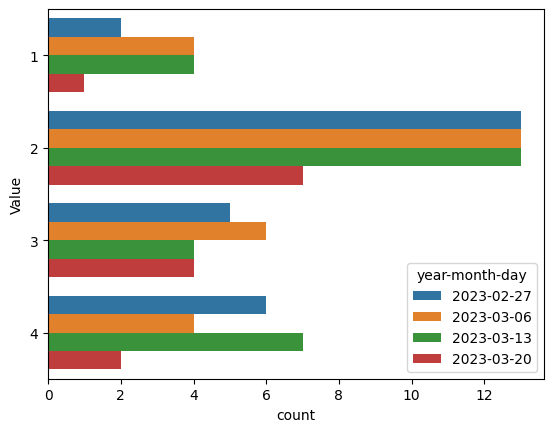

In [ ]:
sns.countplot(data=Mon, y='Value', hue="year-month-day")

<ipython-input-51-892169dfa7ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
<ipython-input-51-892169dfa7ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
<ipython-input-51-892169dfa7ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

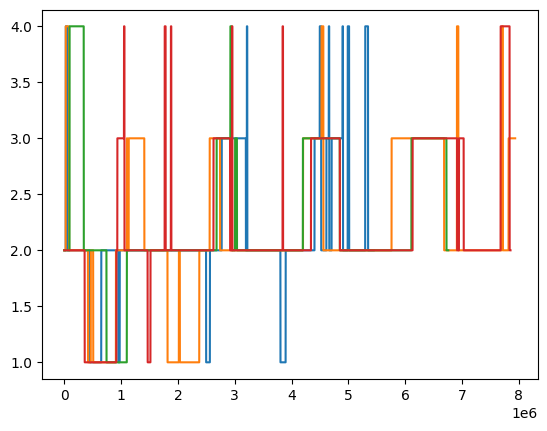

In [ ]:
Mon_date = set(Mon['year-month-day'])
Mon_date = list(Mon_date)

for dt in Mon_date:
  tmp = Mon[Mon["year-month-day"]==dt]

  tmp["Duration (hr)"] = tmp["Duration (hr)"].astype('float') * 1000
  tmp = tmp[["Duration (hr)", "Value"]]
  tmp = np.array(tmp)

  x_list = []
  for x in tmp:
    if x[1] != 0:
      timeseries = np.ones([int(x[0])]) * x[1]
      x_list.append(timeseries)
  
  ts = np.concatenate(x_list)
  
  plt.plot(ts)

plt.show()

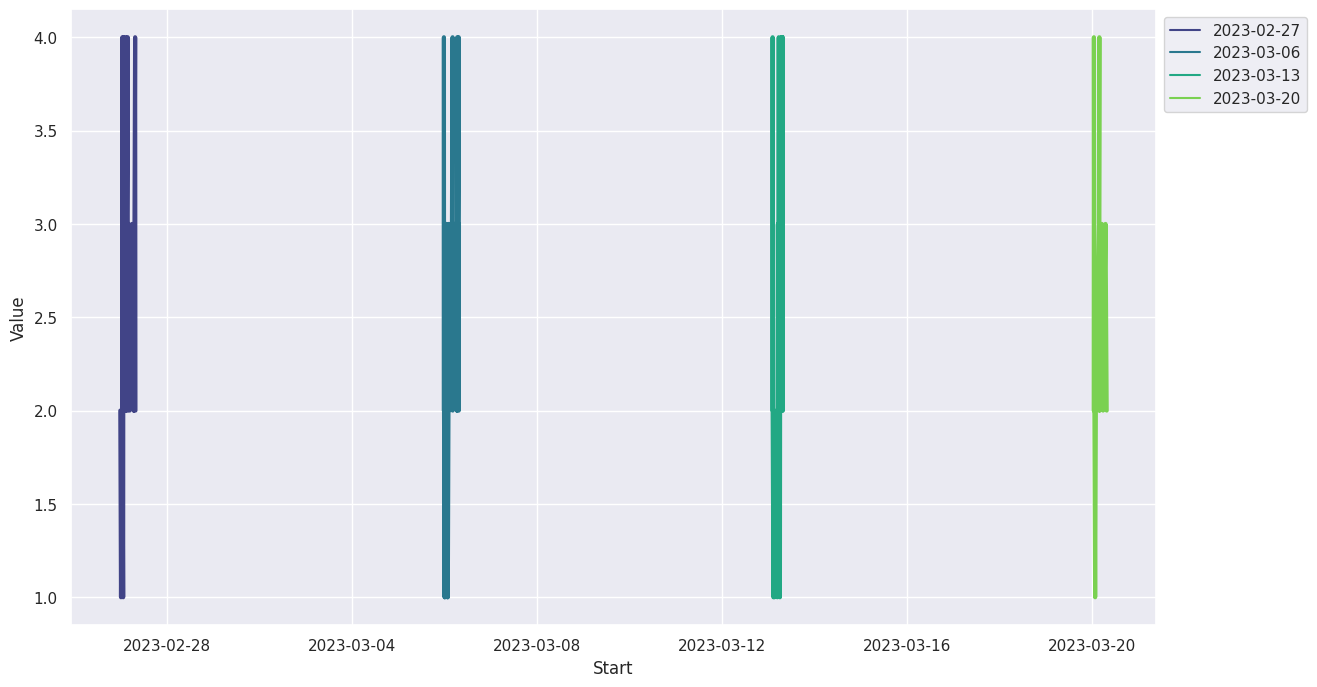

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=Mon, x ='Start', y = 'Value',
                  hue='year-month-day', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

- first - 2/26-3/25 (2/26-3/20, 3/22-3/25) : 3/21일자 데이터가 결측치라 제외해야 함.
- second- 3/27~4/21
- third - 4/23~5/3

In [183]:
# "first" 주기 데이터 저장하기 위한 함수

# 이름 저장을 위해 월별로 구분함 ('first'의 "Feb" 데이터)
start_date = '2023-02-25 12:00:00'
end_date = '2023-02-28 12:00:00'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'first'데이터의 2월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'first'는 2월 26일부터 시작.
d = 26  # 26일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-02-26"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "Feb_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [181]:
# "first" 주기 데이터 저장하기 위한 함수

# 이름 저장을 위해 월별로 구분함 ('first'의 "March" 데이터)
start_date = '2023-02-28 12:00:00'
end_date = '2023-03-20 12:00:00'   # first주기에 3/21이 결측치라 제외해줘야 함.
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'first'데이터의 2월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'first'는 3월 1일부터 시작.
d = 1  # 1일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-03-01"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "March_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [182]:
# "first" 주기 데이터 저장하기 위한 함수

# 이름 저장을 위해 월별로 구분함 ('first'의 "March" 데이터)
start_date = '2023-03-21 12:00:00'
end_date = '2023-03-25 12:00:00'   # first주기에 3/21이 결측치라 제외해줘야 함.
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'first'데이터의 2월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'first'는 3월 22일부터 시작.
d = 22  # 22일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-03-22"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "March_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-04-21 12:00:00'
second = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

second

,Start,End,Duration (hr),Value,Source
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,0.033,2,Sujeong의 Apple Watch
1574,2023-03-26 23:58:09,2023-03-27 00:00:09,0.033,InBed,Sujeong의 Apple Watch
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,0.058,4,Sujeong의 Apple Watch
1576,2023-03-27 00:01:10,2023-03-27 07:30:51,7.490,InBed,NHC
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,0.283,2,Sujeong의 Apple Watch
...,...,...,...,...,...
2577,2023-04-21 07:12:08,2023-04-21 07:25:38,0.225,2,Sujeong의 Apple Watch
2578,2023-04-21 07:25:38,2023-04-21 07:26:08,0.008,3,Sujeong의 Apple Watch
2579,2023-04-21 07:26:08,2023-04-21 07:27:08,0.017,4,Sujeong의 Apple Watch
2580,2023-04-21 07:27:08,2023-04-21 07:28:08,0.017,2,Sujeong의 Apple Watch


In [ ]:
second = second[(second['Source'] == 'NHC') | (second['Source'] != 'NHC') & (second['Value'] != "InBed")]
second.head()

,Start,End,Duration (hr),Value,Source
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,0.033,2,Sujeong의 Apple Watch
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,0.058,4,Sujeong의 Apple Watch
1576,2023-03-27 00:01:10,2023-03-27 07:30:51,7.490,InBed,NHC
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,0.283,2,Sujeong의 Apple Watch
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,0.142,1,Sujeong의 Apple Watch


In [ ]:
# InBed 인덱
idx = second[second['Value']=='InBed'].index
idx = idx.values
idx = idx.tolist()
idx.append(second.index[-1])
idx

[1576,
 1603,
 1664,
 1691,
 1733,
 1768,
 1805,
 1866,
 1872,
 1906,
 1942,
 1986,
 2020,
 2051,
 2080,
 2119,
 2153,
 2177,
 2212,
 2244,
 2296,
 2340,
 2391,
 2421,
 2461,
 2494,
 2533,
 2580]

In [ ]:
len(idx)  # 개수가 안맞음...일일히 봐야 함!

28

,Start,End,Duration (hr),Value,Source,year-month-day,weekday
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,0.033,2,Sujeong의 Apple Watch,2023-03-27,0
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,0.058,4,Sujeong의 Apple Watch,2023-03-27,0
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,0.283,2,Sujeong의 Apple Watch,2023-03-27,0
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,0.142,1,Sujeong의 Apple Watch,2023-03-27,0
1580,2023-03-27 00:29:09,2023-03-27 00:31:09,0.033,2,Sujeong의 Apple Watch,2023-03-27,0
1581,2023-03-27 00:31:09,2023-03-27 00:41:09,0.167,1,Sujeong의 Apple Watch,2023-03-27,0
1582,2023-03-27 00:41:09,2023-03-27 00:43:39,0.042,2,Sujeong의 Apple Watch,2023-03-27,0
1583,2023-03-27 00:43:39,2023-03-27 01:02:09,0.308,1,Sujeong의 Apple Watch,2023-03-27,0
1584,2023-03-27 01:02:09,2023-03-27 01:02:39,0.008,2,Sujeong의 Apple Watch,2023-03-27,0
1585,2023-03-27 01:02:39,2023-03-27 01:13:39,0.183,3,Sujeong의 Apple Watch,2023-03-27,0


In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-03-27 12:00:00'

start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
tmp

,Start,End,Duration (hr),Value,Source
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,0.033,2,Sujeong의 Apple Watch
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,0.058,4,Sujeong의 Apple Watch
1576,2023-03-27 00:01:10,2023-03-27 07:30:51,7.490,InBed,NHC
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,0.283,2,Sujeong의 Apple Watch
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,0.142,1,Sujeong의 Apple Watch
1580,2023-03-27 00:29:09,2023-03-27 00:31:09,0.033,2,Sujeong의 Apple Watch
1581,2023-03-27 00:31:09,2023-03-27 00:41:09,0.167,1,Sujeong의 Apple Watch
1582,2023-03-27 00:41:09,2023-03-27 00:43:39,0.042,2,Sujeong의 Apple Watch
1583,2023-03-27 00:43:39,2023-03-27 01:02:09,0.308,1,Sujeong의 Apple Watch
1584,2023-03-27 01:02:09,2023-03-27 01:02:39,0.008,2,Sujeong의 Apple Watch


In [ ]:
tmp = second[(second['Start']>=start_date) & (second['Start']<=end_date)]

start_date = start_date + datetime.timedelta(days=1)
end_date = end_date + datetime.timedelta(days=1)

tmp


,Start,End,Duration (hr),Value,Source


In [ ]:
# 4/2 InBed 2번 찍힘(2023-04-02 09:26:37	2023-04-02 09:57:17	0.511	InBed	NHC)

# 제외하고는 3/27 - 4/21 까지 이상한 데이터는 없음.

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
start_date = '2023-04-22 12:00:00'
end_date = '2023-05-03 12:00:00'
third = data[(data['Start']>=start_date) & (data['Start']<=end_date)]

third

,Start,End,Duration (hr),Value,Source
2583,2023-04-23 02:11:38,2023-04-23 07:30:00,5.310,InBed,NHC
2584,2023-04-23 02:18:22,2023-04-23 02:37:52,0.325,2,Sujeong의 Apple Watch
2585,2023-04-23 02:18:22,2023-04-23 03:51:22,1.550,InBed,Sujeong의 Apple Watch
2586,2023-04-23 02:37:52,2023-04-23 03:03:22,0.425,1,Sujeong의 Apple Watch
2587,2023-04-23 03:03:22,2023-04-23 03:11:22,0.133,2,Sujeong의 Apple Watch
...,...,...,...,...,...
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,3,Sujeong의 Apple Watch
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,2,Sujeong의 Apple Watch
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,4,Sujeong의 Apple Watch
2953,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,2,Sujeong의 Apple Watch


In [ ]:
third = third[(third['Source'] == 'NHC') | (third['Source'] != 'NHC') & (third['Value'] != "InBed")]
third.tail()

,Start,End,Duration (hr),Value,Source
2948,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,2,Sujeong의 Apple Watch
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,3,Sujeong의 Apple Watch
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,2,Sujeong의 Apple Watch
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,4,Sujeong의 Apple Watch
2953,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,2,Sujeong의 Apple Watch


In [ ]:
third.shape

(301, 5)

In [ ]:
# InBed 인덱
idx = third[third['Value']=='InBed'].index
idx = idx.values
idx = idx.tolist()
idx.append(third.index[-1])
idx

[2583, 2619, 2659, 2705, 2738, 2772, 2795, 2829, 2866, 2910, 2928, 2953]

In [ ]:
len(idx)   # 개수 안맞음...하나하나 보기

12

In [ ]:
start_date = '2023-04-22 12:00:00'
end_date = '2023-04-23 12:00:00'

start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
tmp = third[(third['Start']>=start_date) & (third['Start']<=end_date)]

start_date = start_date + datetime.timedelta(days=1)
end_date = end_date + datetime.timedelta(days=1)

tmp


,Start,End,Duration (hr),Value,Source


In [ ]:
# third - 4/23~5/3
# 이상한 값 없음.

In [ ]:
date = "2023-03-27"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = pd.to_datetime(date, format='%Y-%m-%d', errors='raise')  # datetime 타입으로 변경.
str(loop_date_1)[:10]

'2023-03-27'

In [184]:
# "second" 주기 데이터 저장하기 위한 함수

# 이름 저장을 위해 월별로 구분함 ('second'의 "March" 데이터)
start_date = '2023-03-26 12:00:00'
end_date = '2023-03-31 12:00:00'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'second'데이터의 3월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'second'는 3월 27일부터 시작.
d = 27  # 27일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-03-27"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "March_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [185]:
# "second" 주기 데이터 저장하기 위한 함수

# 이름 저장을 위해 월별로 구분함 ('second'의 "April" 데이터)
start_date = '2023-03-31 12:00:00'
end_date = '2023-04-21 12:00:00'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'second'데이터의 3월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'second'의 4월 데이터는 4월 1일부터 시작.
d = 1  # 1일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-04-01"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "April_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [186]:
# "third" 주기 데이터 저장하기 위한 함수
# 4/23~5/3

# 이름 저장을 위해 월별로 구분함 ('third'의 "April" 데이터)
start_date = '2023-04-22 12:00:00'
end_date = '2023-04-30 12:00:00'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'third'데이터의 4월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'third'의 4월 데이터는 4월 23일부터 시작.
d = 23  # 23일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-04-23"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "April_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [187]:
# "third" 주기 데이터 저장하기 위한 함수
# 4/23~5/3

# 이름 저장을 위해 월별로 구분함 ('third'의 "May" 데이터)
start_date = '2023-04-30 12:00:00'
end_date = '2023-05-3 12:00:00'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S', errors='raise')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S', errors='raise')

# 'third'데이터의 5월 데이터를 tmp로 저장.
# "NHC"와 'InBed'를 모두 제외한 데이터.
tmp = data[(data['Start']>=start_date) & (data['Start']<=end_date)]
tmp = tmp[((tmp['Source'] != 'NHC') & (tmp['Value'] != "InBed"))]

# 'third'의 5월 데이터는 5월 1일부터 시작.
d = 1  # 1일
date_diff = end_date - start_date   # 날짜 차이만큼 반복해서 데이터를 저장할 것이기 때문.
rep = date_diff.days   # 반복할 횟수(날)만 추출
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"   # 데이터를 저장할 경로
os.chdir(file_path)

date = "2023-05-01"   # 'year-month-day'열과 'weekday'를 계산하기 위한 날짜.
loop_date_1 = start_date  # 하루 수면패턴 추출을 위한 시작 date

for i in range(rep):
  loop_date_2 = loop_date_1 + datetime.timedelta(days=1)     # 하루 수면패턴 추출을 위한 끝 date
  loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]  # 하루 수면패턴 추출.
  loop = loop.assign(year_month_day=np.nan, weekday=np.nan)
  loop.loc[:,"year_month_day"] = loop_date_2.strftime("%Y-%m-%d")   # year-month-day에 할당 (3/27일 수면패턴 데이터이면 3/26 12시부터 3/27 12시까지)
  loop[loop.columns[-1]] = datetime.datetime.strptime(loop_date_2.strftime("%Y-%m-%d"), '%Y-%m-%d').weekday()  # 요일 계산

  dst = "May_" + str(d) + '.csv'
  loop.to_csv(dst)

  loop_date_1 = loop_date_2
  d += 1

In [188]:
import os

# 주어진 디렉토리에 있는 항목들의 이름을 담고 있는 리스트를 반환합니다.
# 리스트는 임의의 순서대로 나열됩니다.
file_path = "/content/drive/MyDrive/KDT_project/HACKATHON/data_edit"
file_names = os.listdir(file_path)
file_names

['March_1.csv',
 'March_2.csv',
 'March_3.csv',
 'March_4.csv',
 'March_5.csv',
 'March_6.csv',
 'March_7.csv',
 'March_8.csv',
 'March_9.csv',
 'March_10.csv',
 'March_11.csv',
 'March_12.csv',
 'March_13.csv',
 'March_14.csv',
 'March_15.csv',
 'March_16.csv',
 'March_17.csv',
 'March_18.csv',
 'March_19.csv',
 'March_20.csv',
 'March_22.csv',
 'March_23.csv',
 'March_24.csv',
 'March_25.csv',
 'Feb_26.csv',
 'Feb_27.csv',
 'Feb_28.csv',
 'March_27.csv',
 'March_28.csv',
 'March_29.csv',
 'March_30.csv',
 'March_31.csv',
 'April_1.csv',
 'April_2.csv',
 'April_3.csv',
 'April_4.csv',
 'April_5.csv',
 'April_6.csv',
 'April_7.csv',
 'April_8.csv',
 'April_9.csv',
 'April_10.csv',
 'April_11.csv',
 'April_12.csv',
 'April_13.csv',
 'April_14.csv',
 'April_15.csv',
 'April_16.csv',
 'April_17.csv',
 'April_18.csv',
 'April_19.csv',
 'April_20.csv',
 'April_21.csv',
 'April_23.csv',
 'April_24.csv',
 'April_25.csv',
 'April_26.csv',
 'April_27.csv',
 'April_28.csv',
 'April_29.csv',
 'Ap

In [193]:
cd /content/drive/MyDrive/KDT_project/HACKATHON/data_edit

/root


In [194]:
# 폴더에 있는 파일 가져와서 데이터프레임으로 합치기
data_concat = pd.DataFrame()

for files in file_names:
    df= pd.read_csv(files)
    data_concat = pd.concat([data_concat, df])

In [195]:
data_concat

,Unnamed: 0,Start,End,Duration (hr),Value,Source,year_month_day,weekday
0,607,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,2,Sujeong의 Apple Watch,2023-03-01,2
1,609,2023-03-01 02:12:14,2023-03-01 02:13:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
2,610,2023-03-01 02:13:14,2023-03-01 02:22:14,0.150,2,Sujeong의 Apple Watch,2023-03-01,2
3,612,2023-03-01 02:22:14,2023-03-01 02:23:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
4,613,2023-03-01 02:23:14,2023-03-01 02:30:44,0.125,2,Sujeong의 Apple Watch,2023-03-01,2
...,...,...,...,...,...,...,...,...
16,2948,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,2,Sujeong의 Apple Watch,2023-05-03,2
17,2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,3,Sujeong의 Apple Watch,2023-05-03,2
18,2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,2,Sujeong의 Apple Watch,2023-05-03,2
19,2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,4,Sujeong의 Apple Watch,2023-05-03,2


In [197]:
data_concat = data_concat.drop('Unnamed: 0', axis=1)
data_concat

,Start,End,Duration (hr),Value,Source,year_month_day,weekday
0,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,2,Sujeong의 Apple Watch,2023-03-01,2
1,2023-03-01 02:12:14,2023-03-01 02:13:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
2,2023-03-01 02:13:14,2023-03-01 02:22:14,0.150,2,Sujeong의 Apple Watch,2023-03-01,2
3,2023-03-01 02:22:14,2023-03-01 02:23:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
4,2023-03-01 02:23:14,2023-03-01 02:30:44,0.125,2,Sujeong의 Apple Watch,2023-03-01,2
...,...,...,...,...,...,...,...
16,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,2,Sujeong의 Apple Watch,2023-05-03,2
17,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,3,Sujeong의 Apple Watch,2023-05-03,2
18,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,2,Sujeong의 Apple Watch,2023-05-03,2
19,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,4,Sujeong의 Apple Watch,2023-05-03,2


In [198]:
data_concat["weekday"].value_counts()

6    292
5    283
1    275
4    270
2    261
3    258
0    254
Name: weekday, dtype: int64

In [199]:
Mon = data_concat[data_concat["weekday"]==0]
Tue = data_concat[data_concat["weekday"]==1]
Wed = data_concat[data_concat["weekday"]==2]
Thur = data_concat[data_concat["weekday"]==3]
Fri = data_concat[data_concat["weekday"]==4]
Sat = data_concat[data_concat["weekday"]==5]
Sun = data_concat[data_concat["weekday"]==6]

<Axes: xlabel='count', ylabel='Value'>

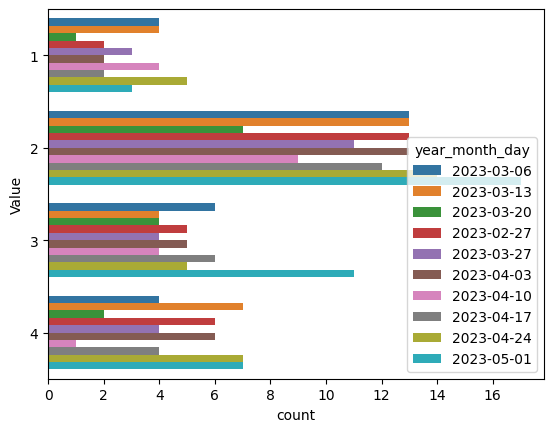

In [201]:
sns.countplot(data=Mon, y='Value', hue="year_month_day")

In [202]:
data_concat.head()

,Start,End,Duration (hr),Value,Source,year_month_day,weekday
0,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,2,Sujeong의 Apple Watch,2023-03-01,2
1,2023-03-01 02:12:14,2023-03-01 02:13:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
2,2023-03-01 02:13:14,2023-03-01 02:22:14,0.150,2,Sujeong의 Apple Watch,2023-03-01,2
3,2023-03-01 02:22:14,2023-03-01 02:23:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
4,2023-03-01 02:23:14,2023-03-01 02:30:44,0.125,2,Sujeong의 Apple Watch,2023-03-01,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 20
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Start           1893 non-null   object 
 1   End             1893 non-null   object 
 2   Duration (hr)   1893 non-null   float64
 3   Value           1893 non-null   int64  
 4   Source          1893 non-null   object 
 5   year_month_day  1893 non-null   object 
 6   weekday         1893 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 118.3+ KB


In [208]:
data_concat['Start'] = pd.to_datetime(data_concat['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
data_concat['End'] = pd.to_datetime(data_concat['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 20
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Start           1893 non-null   datetime64[ns]
 1   End             1893 non-null   datetime64[ns]
 2   Duration (hr)   1893 non-null   float64       
 3   Value           1893 non-null   int64         
 4   Source          1893 non-null   object        
 5   year_month_day  1893 non-null   object        
 6   weekday         1893 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 118.3+ KB


In [229]:
import datetime

tmp = data_concat
tmp = tmp.sort_values('Start')
tmp = tmp.assign(time=np.nan)
tmp['time']=tmp['Start'].dt.time
tmp['time'] = pd.to_datetime(tmp['time'], format='%H:%M:%S', errors='raise')

 
str_datetime = '12:00:00'
start_date = datetime.datetime.strptime(str_datetime, '%H:%M:%S')
tmp_1 = tmp[tmp['time'] <= start_date]
tmp_2 = tmp[tmp['time'] >= start_date]


,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
0,2023-02-26 23:36:12,2023-02-26 23:57:42,0.358,2,Sujeong의 Apple Watch,2023-02-27,0,1900-01-01 23:36:12
1,2023-02-26 23:57:42,2023-02-27 00:31:12,0.558,1,Sujeong의 Apple Watch,2023-02-27,0,1900-01-01 23:57:42
0,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023-02-28,1,1900-01-01 23:59:19
0,2023-03-01 23:54:17,2023-03-01 23:57:17,0.050,2,Sujeong의 Apple Watch,2023-03-02,3,1900-01-01 23:54:17
1,2023-03-01 23:57:17,2023-03-02 00:00:47,0.058,4,Sujeong의 Apple Watch,2023-03-02,3,1900-01-01 23:57:17


In [230]:
tmp_1

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:00:40
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:03:40
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:09:40
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:13:10
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:14:40
...,...,...,...,...,...,...,...,...
16,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,2,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 06:16:05
17,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,3,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 06:44:05
18,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,2,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 07:09:05
19,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,4,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 07:29:05


In [231]:
tmp_2

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
0,2023-02-26 23:36:12,2023-02-26 23:57:42,0.358,2,Sujeong의 Apple Watch,2023-02-27,0,1900-01-01 23:36:12
1,2023-02-26 23:57:42,2023-02-27 00:31:12,0.558,1,Sujeong의 Apple Watch,2023-02-27,0,1900-01-01 23:57:42
0,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023-02-28,1,1900-01-01 23:59:19
0,2023-03-01 23:54:17,2023-03-01 23:57:17,0.050,2,Sujeong의 Apple Watch,2023-03-02,3,1900-01-01 23:54:17
1,2023-03-01 23:57:17,2023-03-02 00:00:47,0.058,4,Sujeong의 Apple Watch,2023-03-02,3,1900-01-01 23:57:17
...,...,...,...,...,...,...,...,...
2,2023-04-23 23:58:14,2023-04-24 00:18:14,0.333,2,Sujeong의 Apple Watch,2023-04-24,0,1900-01-01 23:58:14
0,2023-04-26 23:32:04,2023-04-26 23:49:34,0.292,2,Sujeong의 Apple Watch,2023-04-27,3,1900-01-01 23:32:04
1,2023-04-26 23:49:34,2023-04-27 00:00:04,0.175,1,Sujeong의 Apple Watch,2023-04-27,3,1900-01-01 23:49:34
0,2023-05-02 23:58:05,2023-05-02 23:59:05,0.017,2,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 23:58:05


In [232]:
tmp_1 = tmp_1.sort_values('time')
tmp_2 = tmp_2.sort_values('time')

In [233]:
tmp_1

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
2,2023-04-27 00:00:04,2023-04-27 00:03:04,0.050,2,Sujeong의 Apple Watch,2023-04-27,3,1900-01-01 00:00:04
1,2023-03-27 00:00:09,2023-03-27 00:03:39,0.058,4,Sujeong의 Apple Watch,2023-03-27,0,1900-01-01 00:00:09
8,2023-03-28 00:00:38,2023-03-28 00:29:08,0.475,2,Sujeong의 Apple Watch,2023-03-28,1,1900-01-01 00:00:38
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:00:40
2,2023-03-02 00:00:47,2023-03-02 00:23:17,0.375,2,Sujeong의 Apple Watch,2023-03-02,3,1900-01-01 00:00:47
...,...,...,...,...,...,...,...,...
51,2023-03-11 11:31:42,2023-03-11 11:35:42,0.067,2,Sujeong의 Apple Watch,2023-03-11,5,1900-01-01 11:31:42
52,2023-03-11 11:35:42,2023-03-11 11:36:12,0.008,4,Sujeong의 Apple Watch,2023-03-11,5,1900-01-01 11:35:42
53,2023-03-11 11:36:12,2023-03-11 11:40:12,0.067,2,Sujeong의 Apple Watch,2023-03-11,5,1900-01-01 11:36:12
54,2023-03-11 11:40:12,2023-03-11 11:41:12,0.017,4,Sujeong의 Apple Watch,2023-03-11,5,1900-01-01 11:40:12


In [234]:
tmp_2

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
0,2023-03-27 22:31:08,2023-03-27 22:41:08,0.167,2,Sujeong의 Apple Watch,2023-03-28,1,1900-01-01 22:31:08
0,2023-03-21 22:37:04,2023-03-21 22:40:34,0.058,2,Sujeong의 Apple Watch,2023-03-22,2,1900-01-01 22:37:04
0,2023-04-18 22:38:41,2023-04-18 22:52:41,0.233,2,Sujeong의 Apple Watch,2023-04-19,2,1900-01-01 22:38:41
1,2023-03-21 22:40:34,2023-03-21 23:06:34,0.433,1,Sujeong의 Apple Watch,2023-03-22,2,1900-01-01 22:40:34
1,2023-03-27 22:41:08,2023-03-27 22:42:38,0.025,4,Sujeong의 Apple Watch,2023-03-28,1,1900-01-01 22:41:08
...,...,...,...,...,...,...,...,...
0,2023-03-26 23:58:09,2023-03-27 00:00:09,0.033,2,Sujeong의 Apple Watch,2023-03-27,0,1900-01-01 23:58:09
2,2023-04-23 23:58:14,2023-04-24 00:18:14,0.333,2,Sujeong의 Apple Watch,2023-04-24,0,1900-01-01 23:58:14
1,2023-05-02 23:59:05,2023-05-03 00:01:35,0.042,4,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 23:59:05
0,2023-02-27 23:59:19,2023-02-28 00:22:49,0.392,2,Sujeong의 Apple Watch,2023-02-28,1,1900-01-01 23:59:19


In [ ]:
# 가장 빨리 잠든 시간 = 22:31:08
# 가장 늦게 시간 = 11:41:12

In [267]:
# 22:00:00 부터 1분 간격으로 11:59:00까지 시간을 생성하고 이걸 열로 만들어서 one-hot-encoding을 시도해볼 예정.

start = "22:00:00"
start = pd.to_datetime(start, format='%H:%M:%S', errors='raise')

k = 60 * 13 + 59

# 1분씩 증가시켜서 시간 리스트 만들기.
minute_list = [start]
for i in range(k):
  later = start + datetime.timedelta(minutes=1)
  minute_list.append(later)
  start = later

minute_list[:10]

[Timestamp('1900-01-01 22:00:00'),
 Timestamp('1900-01-01 22:01:00'),
 Timestamp('1900-01-01 22:02:00'),
 Timestamp('1900-01-01 22:03:00'),
 Timestamp('1900-01-01 22:04:00'),
 Timestamp('1900-01-01 22:05:00'),
 Timestamp('1900-01-01 22:06:00'),
 Timestamp('1900-01-01 22:07:00'),
 Timestamp('1900-01-01 22:08:00'),
 Timestamp('1900-01-01 22:09:00')]

In [268]:
minute_list[-10:]

[Timestamp('1900-01-02 11:50:00'),
 Timestamp('1900-01-02 11:51:00'),
 Timestamp('1900-01-02 11:52:00'),
 Timestamp('1900-01-02 11:53:00'),
 Timestamp('1900-01-02 11:54:00'),
 Timestamp('1900-01-02 11:55:00'),
 Timestamp('1900-01-02 11:56:00'),
 Timestamp('1900-01-02 11:57:00'),
 Timestamp('1900-01-02 11:58:00'),
 Timestamp('1900-01-02 11:59:00')]

In [278]:
tmp

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:00:40
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:03:40
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:09:40
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:13:10
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-01 00:14:40
...,...,...,...,...,...,...,...,...
16,2023-05-03 06:16:05,2023-05-03 06:44:05,0.467,2,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 06:16:05
17,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,3,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 06:44:05
18,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,2,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 07:09:05
19,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,4,Sujeong의 Apple Watch,2023-05-03,2,1900-01-01 07:29:05


In [295]:
std = '1900-01-01 12:00:00'
std = pd.to_datetime(std, format='%Y-%m-%d %H:%M:%S', errors='raise')

k = tmp.shape[0]

# std 이전 시간의 경우 1일이 지난 이후의 수면시간인 거니까 1일을 더해줘야 함.
for i in range(k):
  if (tmp.iloc[i, -1] <= std):
    tmp.iloc[i, -1] = tmp.iloc[i, -1] + datetime.timedelta(days=1)  

In [303]:
tmp.head(50)

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,time
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:00:40
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:03:40
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:09:40
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:13:10
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:14:40
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:34:10
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:51:10
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 00:52:10
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 01:26:40
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,1900-01-02 01:36:10


In [305]:
minute_list[-1]

Timestamp('1900-01-02 11:59:00')

In [ ]:
# std = '1900-01-01 12:00:00'
# std = pd.to_datetime(std, format='%Y-%m-%d %H:%M:%S', errors='raise')

# k = tmp.shape[0]

# # std 이전 시간의 경우 1일이 지난 이후의 수면시간인 거니까 1일을 더해줘야 함.
# for i in range(k):
#   if (tmp.iloc[i, -1] <= std):
#     tmp.iloc[i, -1] = tmp.iloc[i, -1] + datetime.timedelta(days=1)  


#     loop = tmp[(tmp['Start']>=loop_date_1) & (tmp['Start']<=loop_date_2)]

# 여기부터!

In [308]:
data_concat.head(50)

,Start,End,Duration (hr),Value,Source,year_month_day,weekday
0,2023-03-01 02:06:14,2023-03-01 02:12:14,0.100,2,Sujeong의 Apple Watch,2023-03-01,2
1,2023-03-01 02:12:14,2023-03-01 02:13:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
2,2023-03-01 02:13:14,2023-03-01 02:22:14,0.150,2,Sujeong의 Apple Watch,2023-03-01,2
3,2023-03-01 02:22:14,2023-03-01 02:23:14,0.017,4,Sujeong의 Apple Watch,2023-03-01,2
4,2023-03-01 02:23:14,2023-03-01 02:30:44,0.125,2,Sujeong의 Apple Watch,2023-03-01,2
5,2023-03-01 02:30:44,2023-03-01 02:46:14,0.258,4,Sujeong의 Apple Watch,2023-03-01,2
6,2023-03-01 02:46:14,2023-03-01 02:56:44,0.175,2,Sujeong의 Apple Watch,2023-03-01,2
7,2023-03-01 02:56:44,2023-03-01 03:27:44,0.517,4,Sujeong의 Apple Watch,2023-03-01,2
8,2023-03-01 03:27:44,2023-03-01 03:53:14,0.425,2,Sujeong의 Apple Watch,2023-03-01,2
9,2023-03-01 03:53:14,2023-03-01 04:20:14,0.450,1,Sujeong의 Apple Watch,2023-03-01,2


In [309]:
data_concat.shape

(1893, 7)

In [311]:
data_concat.groupby("Value")['Duration (hr)'].max()

Value
1    1.020
2    1.730
3    1.190
4    0.692
Name: Duration (hr), dtype: float64

In [312]:
data_concat.groupby("Value")['Duration (hr)'].min()

Value
1    0.008
2    0.008
3    0.008
4    0.008
Name: Duration (hr), dtype: float64

In [ ]:
test = data_concat.groupby("Value")['Duration (hr)'].value_counts()
test = test.to_frame()
test.head(50)

In [325]:
data_concat[data_concat["Value"]==3]

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,diff
11,2023-03-01 04:22:14,2023-03-01 04:23:14,0.017,3,Sujeong의 Apple Watch,2023-03-01,2,0 days 00:01:00
14,2023-03-01 04:34:14,2023-03-01 04:37:14,0.050,3,Sujeong의 Apple Watch,2023-03-01,2,0 days 00:03:00
18,2023-03-01 05:56:14,2023-03-01 06:13:44,0.292,3,Sujeong의 Apple Watch,2023-03-01,2,0 days 00:17:30
22,2023-03-01 07:17:14,2023-03-01 07:52:14,0.583,3,Sujeong의 Apple Watch,2023-03-01,2,0 days 00:35:00
28,2023-03-01 09:15:44,2023-03-01 09:19:14,0.058,3,Sujeong의 Apple Watch,2023-03-01,2,0 days 00:03:30
...,...,...,...,...,...,...,...,...
7,2023-05-03 02:37:35,2023-05-03 03:07:35,0.500,3,Sujeong의 Apple Watch,2023-05-03,2,0 days 00:30:00
9,2023-05-03 04:35:05,2023-05-03 04:43:35,0.142,3,Sujeong의 Apple Watch,2023-05-03,2,0 days 00:08:30
12,2023-05-03 04:46:05,2023-05-03 04:47:35,0.025,3,Sujeong의 Apple Watch,2023-05-03,2,0 days 00:01:30
14,2023-05-03 05:55:35,2023-05-03 06:15:05,0.325,3,Sujeong의 Apple Watch,2023-05-03,2,0 days 00:19:30


In [330]:
Feb_26 = pd.read_csv('/content/drive/MyDrive/KDT_project/HACKATHON/data_edit/Feb_26.csv')
Feb_26 = Feb_26.drop('Unnamed: 0', axis=1)
Feb_26  

,Start,End,Duration (hr),Value,Source,year_month_day,weekday
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6


In [336]:
du = 0
du_list = []

for i in range(Feb_26.shape[0]):
  du += Feb_26.loc[i,"Duration (hr)"]
  if Feb_26.loc[i,"Value"] == 3:
    du_list.append(du)
    du = 0

In [337]:
du_list

[3.565, 0.1, 1.7590000000000001, 1.778, 1.517]

In [338]:
import os

path = '/content/drive/MyDrive/KDT_project/HACKATHON/data_edit'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

In [341]:
file_list_py

['March_1.csv',
 'March_2.csv',
 'March_3.csv',
 'March_4.csv',
 'March_5.csv',
 'March_6.csv',
 'March_7.csv',
 'March_8.csv',
 'March_9.csv',
 'March_10.csv',
 'March_11.csv',
 'March_12.csv',
 'March_13.csv',
 'March_14.csv',
 'March_15.csv',
 'March_16.csv',
 'March_17.csv',
 'March_18.csv',
 'March_19.csv',
 'March_20.csv',
 'March_22.csv',
 'March_23.csv',
 'March_24.csv',
 'March_25.csv',
 'Feb_26.csv',
 'Feb_27.csv',
 'Feb_28.csv',
 'March_27.csv',
 'March_28.csv',
 'March_29.csv',
 'March_30.csv',
 'March_31.csv',
 'April_1.csv',
 'April_2.csv',
 'April_3.csv',
 'April_4.csv',
 'April_5.csv',
 'April_6.csv',
 'April_7.csv',
 'April_8.csv',
 'April_9.csv',
 'April_10.csv',
 'April_11.csv',
 'April_12.csv',
 'April_13.csv',
 'April_14.csv',
 'April_15.csv',
 'April_16.csv',
 'April_17.csv',
 'April_18.csv',
 'April_19.csv',
 'April_20.csv',
 'April_21.csv',
 'April_23.csv',
 'April_24.csv',
 'April_25.csv',
 'April_26.csv',
 'April_27.csv',
 'April_28.csv',
 'April_29.csv',
 'Ap

In [340]:
cd /content/drive/MyDrive/KDT_project/HACKATHON/data_edit

/root


In [350]:
du_df = pd.DataFrame()
du_df["Feb"] = du_list
du_df

,Feb
0,3.158
1,1.602
2,0.067
3,1.455
4,0.901


In [357]:
for files in file_list_py:
    df= pd.read_csv(files)
    du = 0
    du_list = []
    name, ext = os.path.splitext(files)

    for i in range(df.shape[0]):
      du += df.loc[i,"Duration (hr)"]
      if df.loc[i,"Value"] == 3:
        du_list.append(du)
        du = 0
    print(name, ':', du_list)

March_1 : [2.284, 0.23399999999999999, 1.609, 1.641, 1.4520000000000002]
March_2 : [1.441, 1.5170000000000001, 0.642, 1.835, 0.333, 1.403, 0.184]
March_3 : [2.383, 1.966, 1.241, 0.133, 1.066]
March_4 : [1.309, 1.884, 1.635, 0.325, 1.209, 0.43299999999999994, 0.601]
March_5 : [1.092, 1.4329999999999998, 0.33299999999999996, 1.5539999999999998, 0.6920000000000001, 1.725]
March_6 : [1.108, 0.30000000000000004, 1.3330000000000002, 1.785, 2.158, 1.251]
March_7 : [1.117, 1.8820000000000001, 2.462, 1.9239999999999997, 1.098]
March_8 : [1.4820000000000002, 1.574, 2.077, 1.8199999999999998, 0.708]
March_9 : [1.4000000000000001, 2.1, 2.17, 1.415]
March_10 : [2.7420000000000004, 2.217, 1.4179999999999997, 0.092, 0.041]
March_11 : [3.1829999999999994, 1.568, 1.475, 1.098, 0.42500000000000004, 0.066, 1.274]
March_12 : [2.8930000000000007, 0.066, 0.308, 1.9169999999999998, 1.642, 0.46699999999999997]
March_13 : [3.1950000000000003, 1.3, 0.159, 0.242]
March_14 : [3.303, 1.6239999999999999, 0.28300000

In [ ]:
# 90분 주기로 30초 간격으로 one-step prediction 해보기


In [252]:
start = "22:00:00"
start = pd.to_datetime(start, format='%H:%M:%S', errors='raise')
end = '11:59:00'
end = pd.to_datetime(end, format='%H:%M:%S', errors='raise')

end = end + datetime.timedelta(days=1)
print(end - start)  # 60 * 13 + 59 번 반복하면 된다.

0 days 13:59:00


Timedelta('0 days 13:59:00')

In [245]:
duration = data_concat['Duration (hr)'].value_counts()
duration = duration.to_frame()
duration

,Duration (hr)
0.017,191
0.008,152
0.025,124
0.033,83
0.042,69
...,...
1.730,1
0.800,1
1.570,1
1.270,1


<Axes: xlabel='Duration (hr)', ylabel='count'>

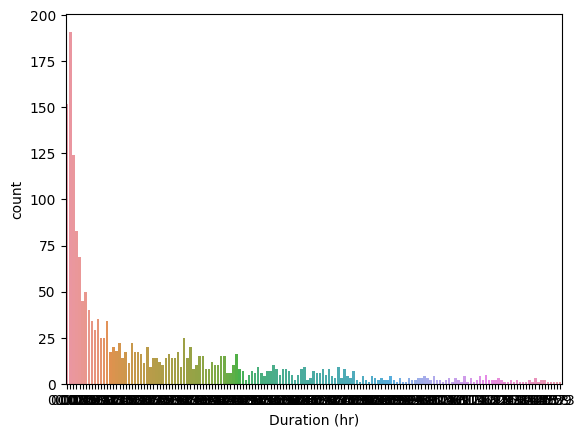

In [247]:
sns.countplot(data=data_concat, x='Duration (hr)')

In [243]:
type(duration)

pandas.core.frame.DataFrame

In [235]:
group = data_concat.groupby(['Duration (hr)']).count()
group = group.reset_index()
group

,Duration (hr),Start,End,Value,Source,year_month_day,weekday
0,0.008,152,152,152,152,152,152
1,0.017,191,191,191,191,191,191
2,0.025,124,124,124,124,124,124
3,0.033,83,83,83,83,83,83
4,0.042,69,69,69,69,69,69
...,...,...,...,...,...,...,...
156,1.520,1,1,1,1,1,1
157,1.570,1,1,1,1,1,1
158,1.580,1,1,1,1,1,1
159,1.590,1,1,1,1,1,1


# 시간을 30초 / 1분 별로 구간을 나눠서 시간에 대한 축을 생성하고 시간 별(groupby)로 가장 많은 Value를 갖는 것을 확인해봐야 한다. 
# 그러면 동시에 padding 어떻게 할지도 정할 수 있을 듯!

- 28분은 duration 0.467
- 25분은 duration 0.417
- 20분은 duration 0.333

- 7분은 0.125
- 6분은 0.1
- 3분은 0.05
- 1분은 duration 0.017
- 30초는 duration 0.008



In [205]:
group = data_concat.groupby(['weekday'])['Value'].count()
group = group.reset_index()
group

,weekday,Value
0,0,254
1,1,275
2,2,261
3,3,258
4,4,270
5,5,283
6,6,292
